# Phân lớp ảnh bằng mô hình Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import copy
from collections import Counter
from sklearn.model_selection import train_test_split

### Đọc dữ liệu

In [2]:
# Đọc dữ liệu
train = np.genfromtxt("train.csv", delimiter=',')[1:]
Y = train[:, 0:1]
X = train[:, 1:]

### Hiển thị ảnh

In [3]:
def display_image(img):
    plt.figure(figsize=(1, 1))
    img_copy = copy.copy(img.reshape((28, 28)))
    plt.imshow(img_copy, cmap='gray')
    plt.axis('off')

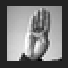

In [4]:
display_image(X[np.random.choice(range(0, X.shape[0]))])

### Tách tập dữ liệu thành tập train và tập test

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X / 255,
                                                    Y,
                                                    test_size=0.25,
                                                    random_state=100)

In [6]:
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

### Huấn luyện mô hình bằng thuật toán Stochastic gradient descent

In [7]:
def logistic_regression(X, Y, learning_rate=0.1):
    outputs = np.unique(Y)
    W = np.zeros((X.shape[1], int(np.max(outputs)) + 1))
    for output in outputs:
        w = np.zeros((X.shape[1], 1))
        N = X.shape[0]
        while True:
            binary_Y = np.where(Y == output, 1, -1)
            previous_w = copy.copy(w)
            rand_idxs = np.random.permutation(N)
            for idx in rand_idxs:
                x = X[idx].reshape(w.shape)
                y = binary_Y[idx, 0]
                gradient = -y * x / (1 + np.exp(y * w.T @ x))
                w -= learning_rate * gradient
            delta_w = previous_w - w
            if np.sqrt(delta_w.T @ delta_w) < 0.01:
                break
        print("Output {0} done!".format(int(output)), end="\r")
        W[:, int(output):int(output + 1)] = w
    return W

In [8]:
W = logistic_regression(X_train, Y_train)
print(W)

[[-16.49032776 -16.84392403  -8.45423824 ... -23.67787566 -25.72099897
  -21.23345541]
 [  4.91683482   1.34581507   1.84614887 ...  -0.463481     5.93717241
    4.05999061]
 [  4.22931506   0.5950589    1.3701425  ...   1.63757795   7.91760584
    3.98851696]
 ...
 [ -0.30778311   2.18674634   3.94908281 ...   2.90762337  -4.14251164
   -0.83694095]
 [ -0.27548459   0.25466134   6.40130756 ...   4.54764952  -3.00997995
   -3.50713375]
 [ -0.92620642  -2.04440032   7.70671548 ...   0.89819223   1.7953174
    0.43637939]]


### Độ chính xác trên tập train

In [9]:
np.mean(
    Y_train.reshape(Y_train.shape[0]) == np.argmax(
        1 / (1 + np.exp(-X_train @ W)), axis=1))

1.0

### Độ chính xác trên tập test

In [10]:
np.mean(
    Y_test.reshape(Y_test.shape[0]) == np.argmax(1 / (1 + np.exp(-X_test @ W)),
                                                 axis=1))

0.9962962962962963

# Tuy nhiên đây chưa phải là con số đúng!